<h2 align="center">Effect of COVID-19 on 20 tech stocks</h2>
<p> COVID-19 has changed our lives. We are in lockdown, and have had to make major changes to our lifestyles. The stock market has had to deal with some drastic changes of its own. In this project I will explore the fate of some of tech stocks to see how good (or bad) they have braved the COVID-19 storm.

Disclaimer: this project is meant for some basic pandas and viz skills practice and **should not** be used to derive any financial advice. </p>

In [1]:
%%html
<style type="text/css">

 body {
     background-color: #4CB1F7;
     margin: 0;
     padding: 6em;
     font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
     font-size: 1em;
}



 h2 {
     color: #0339A6;
     height: 3em;
     width: 100%;
     margin-bottom: 1em;
     font-size: 2em;  
 }

div.output_area {
    width: 100%;
    font-size: 1.1em;
    color: #565656;
}

div.output_area pre {
    font-size: 1.1em;
    padding: 1.5em;
}

div.output_png.output_subarea {
    max-width: 100%;
}

</style>

In [2]:
import datetime

now = datetime.datetime.now()
print("Last updated:", now.strftime("%Y-%m-%d" + " at "+ "%H:%M:%S"))

Last updated: 2021-08-10 at 14:17:14


### Get the Data

In this section I use pandas to scrape data from Yahoo! finance using pandas.

In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import os
import yfinance as yf


#Plotly Method Imports
import plotly # You can use matplotlib as well for these plots as well
import cufflinks as cf 
cf.go_offline()

The stock data for these tickers are queried from Jan 1st 2017 to current date and saved in their own dataframes.

stock tickers are as follows:
MSFT, AAPL, AMZN, GOOG, BABA, FB, INTC, NVDA, CRM, PYPL, TSLA, AMD, EA, MTCH, TTD, ZG, ATVI, YELP, TIVO, ZM and VMW

In [4]:
start = datetime.datetime(2017, 1, 1) # START ON January 1 2017
end = datetime.date.today() # LOOK AT STOCKS TILL current date

tickers = ['MSFT','AAPL','AMZN','GOOG','BABA','FB','INTC','NVDA','CRM','PYPL','TSLA','AMD','EA','MTCH','TTD','ZG','ATVI','YELP','ZM','VMW']
df_map = {}

for tick in tickers:
    data_source='google'
    stock =yf.download(tick,start, end)
    df_map[tick] = stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
#Using pd.concat to concatenate the stock dataframes together to a single data frame called tech_stocks

In [6]:
tech_stocks = pd.concat(df_map,axis = 1,keys = tickers)
tech_stocks.columns.names = ['Stock Ticker','Stock Info']
tech_stocks.tail()

Stock Ticker        MSFT                                                  \
Stock Info          Open        High         Low       Close   Adj Close   
Date                                                                       
2021-08-03    285.420013  287.230011  284.000000  287.119995  287.119995   
2021-08-04    286.220001  287.589996  284.649994  286.510010  286.510010   
2021-08-05    286.880005  289.630005  286.100006  289.519989  289.519989   
2021-08-06    288.510010  289.500000  287.619995  289.459991  289.459991   
2021-08-09    289.750000  291.549988  287.809998  288.329987  288.329987   

Stock Ticker                  AAPL                                      ...  \
Stock Info      Volume        Open        High         Low       Close  ...   
Date                                                                    ...   
2021-08-03    17879000  145.809998  148.039993  145.179993  147.360001  ...   
2021-08-04    16191300  147.270004  147.789993  146.279999  146.949997  ...   
2021-08-05    13900200  146.979996  147.839996  146.169998  147.059998  ...   
2021-08-06    16585200  146.350006  147.110001  145.630005  146.139999  ...   
2021-08-09    16117600  146.199997  146.699997  145.520004  146.089996  ...   

Stock Ticker          ZM                                            VMW  \
Stock Info           Low       Close   Adj Close     Volume        Open   
Date                                                                      
2021-08-03    371.588989  374.880005  374.880005  2190900.0  154.059998   
2021-08-04    376.500000  400.579987  400.579987  5563800.0  156.699997   
2021-08-05    391.820007  398.679993  398.679993  3427600.0  157.440002   
2021-08-06    380.700012  383.470001  383.470001  3088000.0  158.320007   
2021-08-09    378.200012  383.339996  383.339996  2306600.0  156.149994   

Stock Ticker                                                          
Stock Info          High         Low       Close   Adj Close  Volume  
Date                                                                  
2021-08-03    158.139999  153.710007  157.309998  157.309998  816500  
2021-08-04    157.500000  155.660004  156.770004  156.770004  610900  
2021-08-05    158.649994  157.059998  158.619995  158.619995  572800  
2021-08-06    158.850006  157.039993  157.380005  157.380005  537800  
2021-08-09    158.330002  155.770004  157.240005  157.240005  868000  

[5 rows x 120 columns]

What is the maximum and minimum of the Close price for each tech company's stock throughout the time period? Let's also use a bar plot to visualize the data as well.

Note: We use a log scale for close price to normalize the values to a uniform scale.

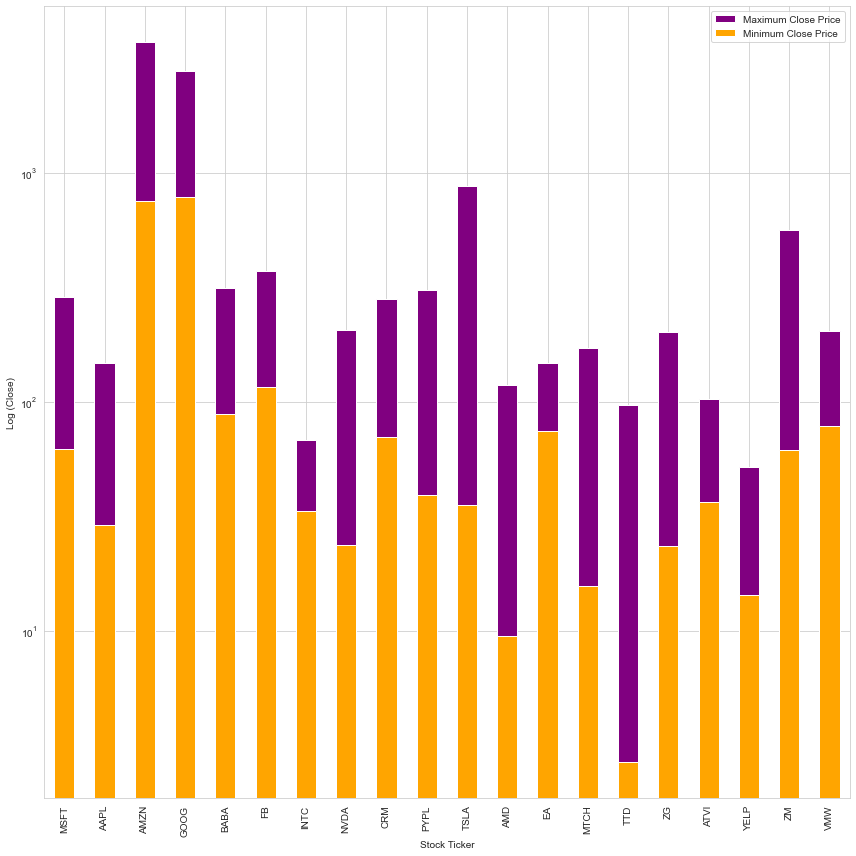

In [7]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
max_close = tech_stocks.xs(key='Close',axis=1,level='Stock Info').max()
min_close = tech_stocks.xs(key='Close',axis=1,level='Stock Info').min()
plt.figure(figsize=(12,12))
plt.yscale('log')
plt.tight_layout()
plt.ylabel('Log (Close)')
max_close.plot(kind='bar',color='purple',label='Maximum Close Price')
min_close.plot(kind='bar',color='orange',label='Minimum Close Price')
plt.legend()
plt.tight_layout()

Using the bar-plot above, stocks can be classified into two broad groups: Reliable stocks and Volatile stocks. 

**Reliable stocks** are the ones that didnot show much difference between the minimum Close price and maximum Close Price in the time period specified. e.g.: GOOG and AMZN. 
**Volatile stocks** are the ones that fluctate the most between the minimum and maximum closing price of stocks. e.g.: TTD and TIVO

However, a more interesting comparison is to compare the same data against two separate time-periods: Pre-COVID-19 and Post-COVID-19.

Text(0.5, 1.0, 'Post COVID-19: Jan 2020 - Today')

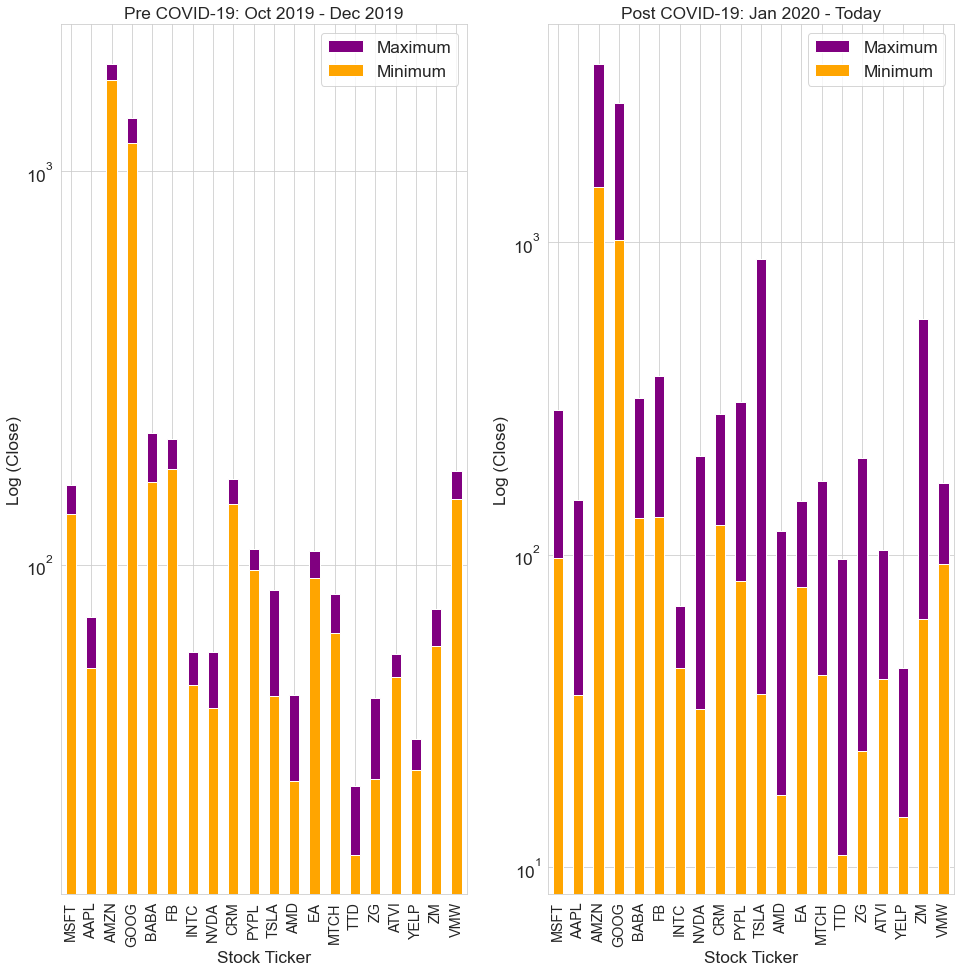

In [8]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
current_date_str = datetime.date.today().strftime("%Y-%m-%d") #to store the current date as a string
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,16))


max_close_pre_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':'2019-12-31'].max()
min_close_pre_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':'2019-12-31'].min()
#plot
max_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='purple')
min_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='orange')
axes[0].set_yscale('log')
axes[0].set_ylabel('Log (Close)')
axes[0].legend(["Maximum", "Minimum"])
axes[0].set_title('Pre COVID-19: Oct 2019 - Dec 2019')

max_close_post_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2020-01-01':current_date_str].max()
min_close_post_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-01-01':current_date_str].min()
#plot
max_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='purple')
min_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='orange')
axes[1].set_yscale('log')
axes[1].set_ylabel('Log (Close)')
axes[1].legend(["Maximum", "Minimum"])
axes[1].set_title('Post COVID-19: Jan 2020 - Today')


It is clear that the more **Reliable** stocks like AAPL and AMZN in the pre COVID-19 period saw significant volatility in their closing prices once the COVID-19 storm hit.    

The next analysis is to use pandas pct_change() method on the Close column to create a **Returns** value. A return is defined as the change in price of stocks over time, which may be represented in terms of price change or percentage change. A positive return represents a profit while a negative return marks a loss.

In [9]:
returns = pd.DataFrame() #empty dataframe
for tick in tickers:
    returns[tick+' Return'] = tech_stocks[tick]['Close'].pct_change()
returns.tail()

,MSFT Return,AAPL Return,AMZN Return,GOOG Return,BABA Return,FB Return,INTC Return,NVDA Return,CRM Return,PYPL Return,TSLA Return,AMD Return,EA Return,MTCH Return,TTD Return,ZG Return,ATVI Return,YELP Return,ZM Return,VMW Return
Date,,,,,,,,,,,,,,,,,,,,
2021-08-03,0.008075,0.012644,0.010434,0.002136,-0.013544,-0.002017,0.007079,0.003291,0.001121,0.009262,0.000099,0.036178,-0.029908,-0.017788,-0.000361,-0.028598,-0.035404,-0.013514,-0.010766,0.020367
2021-08-04,-0.002124,-0.002782,-0.003422,-0.001845,0.016871,0.021865,-0.002960,0.023164,0.012607,0.007313,0.001663,0.055171,0.000787,-0.049852,0.039442,0.045343,0.021170,-0.015616,0.068555,-0.003433
2021-08-05,0.010506,0.000749,0.006340,0.006701,-0.007125,0.011284,-0.000186,0.017905,0.026170,0.018766,0.005219,-0.054054,-0.021728,-0.027562,-0.035400,-0.001177,-0.014720,0.035347,-0.004743,0.011801
2021-08-06,-0.000207,-0.006256,-0.009197,0.000701,-0.014502,0.001488,0.000557,-0.013132,0.000120,-0.004026,-0.021732,-0.019938,-0.003872,-0.004303,0.007916,-0.064007,0.026270,0.052419,-0.038151,-0.007817
2021-08-09,-0.003904,-0.000342,-0.000918,0.007049,-0.005805,-0.005227,0.002411,-0.003486,-0.005068,-0.004973,0.020970,-0.022977,-0.001320,-0.031964,-0.032366,0.001647,-0.012374,-0.008174,-0.000339,-0.000890


A looks at the minimum and maximum returns for each stock tick in this time-period:

In [10]:
returns.idxmin()

MSFT Return   2020-03-16
AAPL Return   2020-03-16
AMZN Return   2020-03-12
GOOG Return   2020-03-16
BABA Return   2020-12-24
FB Return     2018-07-26
INTC Return   2020-03-16
NVDA Return   2018-11-16
CRM Return    2020-03-16
PYPL Return   2020-03-16
TSLA Return   2020-09-08
AMD Return    2017-05-02
EA Return     2019-02-06
MTCH Return   2018-05-01
TTD Return    2021-05-10
ZG Return     2018-11-07
ATVI Return   2018-11-09
YELP Return   2018-11-09
ZM Return     2020-11-09
VMW Return    2018-01-29
dtype: datetime64[ns]

It is interesting to note that most of these stocks had their lowest return in March 2020

In [11]:
returns.idxmax()

MSFT Return   2020-03-13
AAPL Return   2020-03-13
AMZN Return   2017-10-27
GOOG Return   2019-07-26
BABA Return   2017-06-08
FB Return     2019-01-31
INTC Return   2020-03-13
NVDA Return   2017-05-10
CRM Return    2020-08-26
PYPL Return   2020-03-24
TSLA Return   2020-02-03
AMD Return    2019-01-30
EA Return     2019-02-08
MTCH Return   2019-08-07
TTD Return    2018-05-11
ZG Return     2019-02-22
ATVI Return   2017-02-10
YELP Return   2017-08-04
ZM Return     2020-09-01
VMW Return    2020-03-13
dtype: datetime64[ns]

And for some, their highest returns were seen in March 2020 as well thereby confirming that the COVID-19 has indeed rendered the stock market more unpredictable than in the recent past.

Now, two new series, named `pre_corona` and `post_corona` are initialised with the standard deviation of stock returns from October - December 2019 and standard deviation of stock returns from January - March 2020, respectively. This series is sorted and hence if the stocks occur at the right end of the chart, they are deemed **volatile** with significant values of standard deviation whereas if they occur on the left they could be deemed **reliable**.

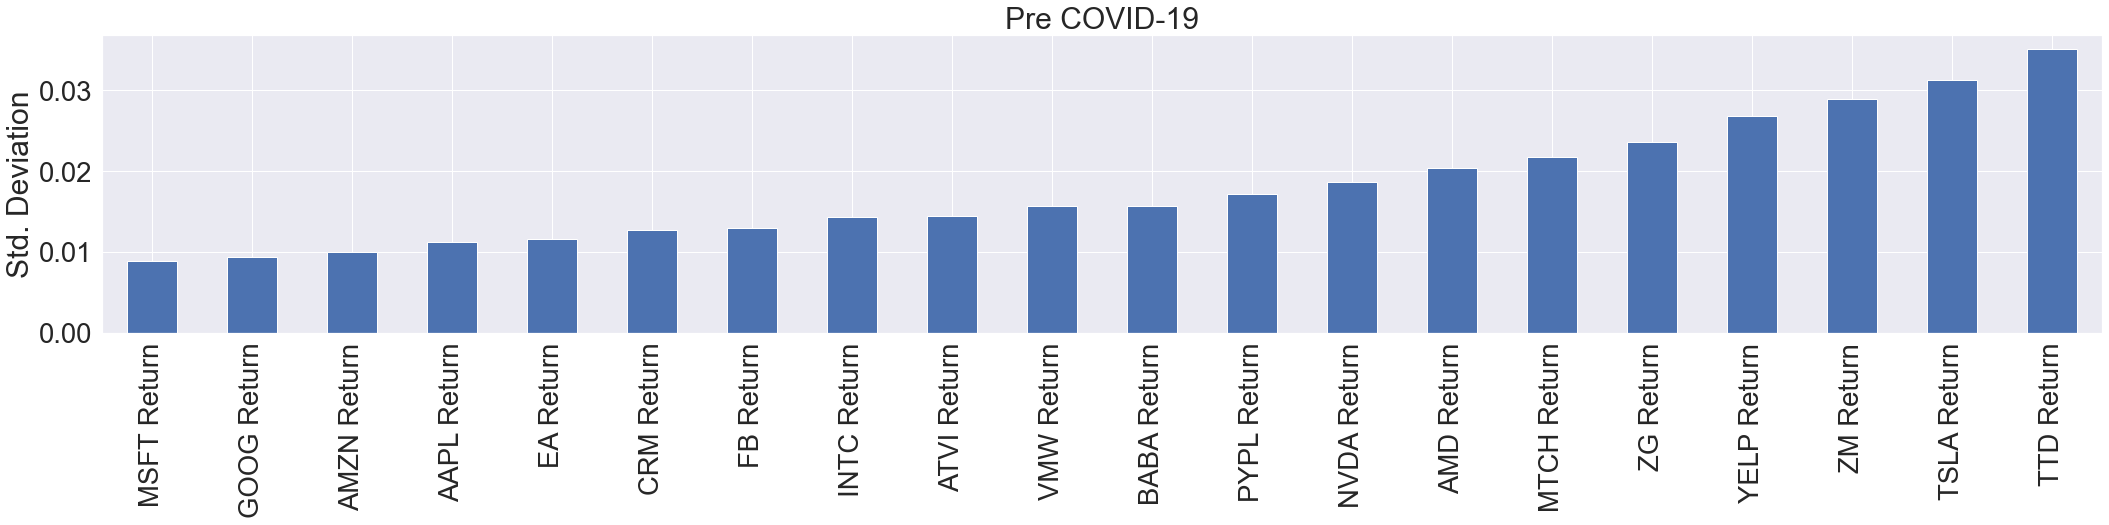

In [12]:
pre_corona=returns.loc['2019-10-01':'2019-12-31'].std()
sns.set(font_scale=2.5)
plt.figure(figsize=(30,8))
pre_corona.sort_values().plot.bar(title="Pre COVID-19")
plt.ylabel("Std. Deviation")
plt.tight_layout()

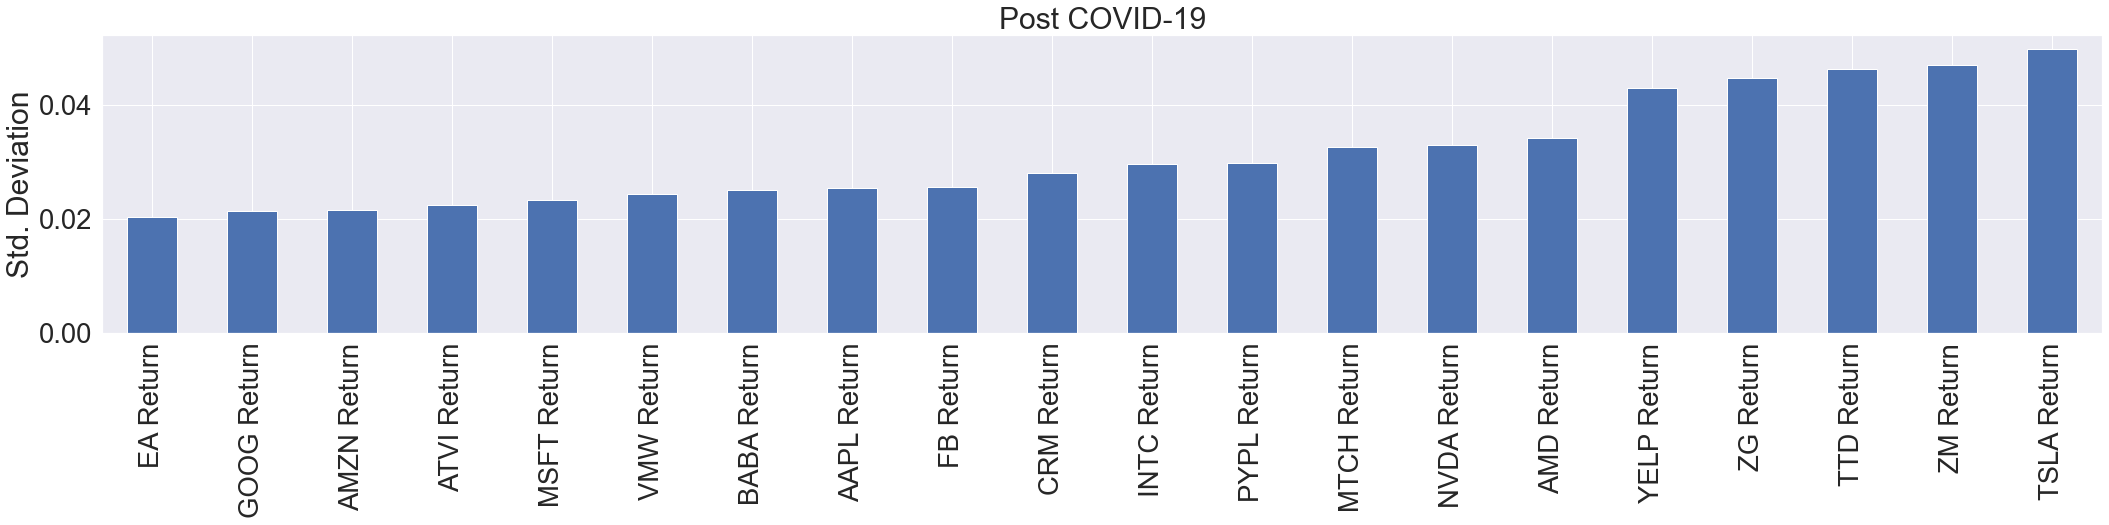

In [13]:
post_corona=returns.loc['2020-01-01':current_date_str].std()
sns.set(font_scale=2.5)
plt.figure(figsize=(30,8))
post_corona.sort_values().plot.bar(title="Post COVID-19")
plt.ylabel("Std. Deviation")
plt.tight_layout()

It is clear that MSFT has suffered the most - shifting from the most **reliable** stock to a relatively **volatile** stock due to this pandemic!

From the above collection, let's choose 5 stocks that have suffered significant effects. I am picking the following - MSFT, BABA, AAPL, MTCH and ZM. Interesting is the irregularity of ZM stocks (that provides a video conferencing service) which shot up to being a necessary tool for all kinds of Work from Home requirements. 

In [14]:
selected_tickers = ['MSFT', 'BABA', 'AAPL', 'MTCH','ZM']
selected_tech_stocks = pd.concat([df_map['MSFT'],df_map['BABA'],df_map['AAPL'],df_map['MTCH'],df_map['ZM']],axis=1,keys=selected_tickers)
selected_tech_stocks.columns.names = ['Stock Ticker','Stock Info']
selected_tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':current_date_str].iplot(width=3.5)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.tight_layout()

Finally: Using a heatmap of the correlation between the selected stocks Close Price

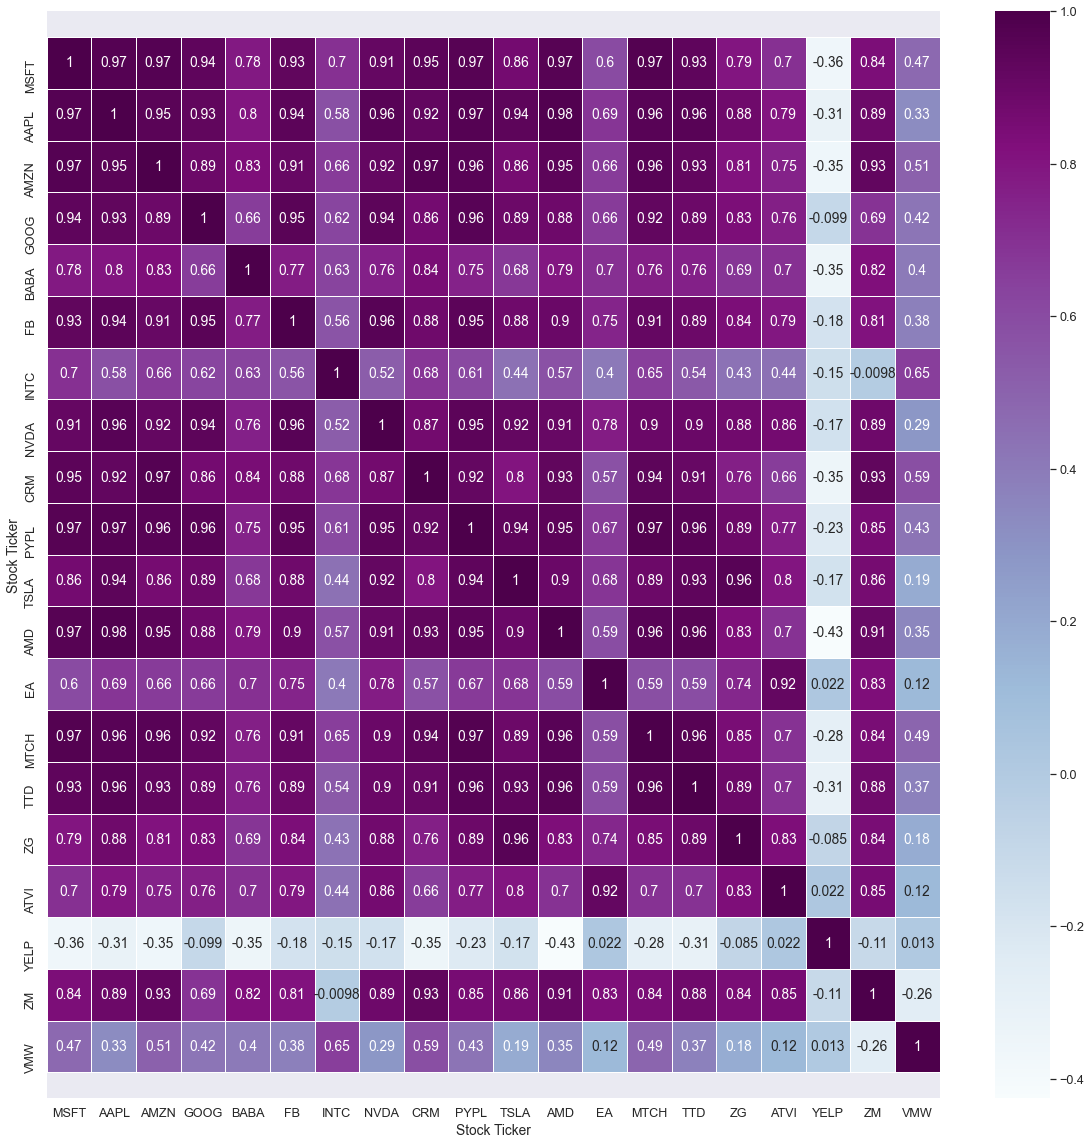

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.15)
sns.heatmap(tech_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),linewidths=.5,cmap='BuPu',annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()
plt.tight_layout()